#  Rain Prediction using ML

### Time Line of the Project :
- Data Analysis
- Handling Missing Values
- Handling Categorical Varibales
- Feature Engineering
- Model Building using ML
- Model Building using Auto ML i.e PyCaret

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
import math
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=  pd.read_csv("/content/weatherAUS.csv")
pd.set_option("display.max_columns", None)

In [5]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [6]:
df.nunique()

,0
Date,3436
Location,49
MinTemp,389
MaxTemp,505
Rainfall,681
Evaporation,358
Sunshine,145
WindGustDir,16
WindGustSpeed,67
WindDir9am,16


#### Discrete Variable are countable in finit amount of time while numerical variable are to much in number to count

In [7]:
# Numerical features
num_var = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Discrete numerical features (few unique values)
discrete_var = [col for col in num_var if df[col].nunique() <= 25]

# Continuous numerical features
cont_var = [col for col in num_var if col not in discrete_var]

# Categorical features (object or category type)
categ_var = df.select_dtypes(include=['object']).columns.tolist()


In [8]:
df[categ_var]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,E,SE,ENE,No,No
145456,2017-06-22,Uluru,NNW,SE,N,No,No
145457,2017-06-23,Uluru,N,SE,WNW,No,No
145458,2017-06-24,Uluru,SE,SSE,N,No,No


### Handling Missing Values

In [9]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


the percentage of missing values in each column.

In [10]:
df.isnull().sum()*100/len(df)

,0
Date,0.000000
Location,0.000000
MinTemp,1.020899
MaxTemp,0.866905
Rainfall,2.241853
Evaporation,43.166506
Sunshine,48.009762
WindGustDir,7.098859
WindGustSpeed,7.055548
WindDir9am,7.263853


In [11]:
def find_var_type(var):


    if var in discrete_var:
        print("{} is a Numerical Variable, Discrete in nature".format(var))
    elif var in cont_var :
        print("{} is a Numerical Variable, Continuous in nature".format(var))
    else :
        print("{} is a Categorical Variable".format(var))

In [12]:
find_var_type('Cloud3pm')

Cloud3pm is a Numerical Variable, Discrete in nature


### Ramdom Sample Imputation for the our variables which are having the most percentage of Nul Vlaues

In [13]:
def RandomSampleImputation(df, feature):
    # Randomly sample from non-null values
    random_sample = df[feature].dropna().sample(
        df[feature].isnull().sum(), random_state=0, replace=True
    )
    # Align the sampled index to the null index
    random_sample.index = df[df[feature].isnull()].index

    # Fill in the missing values with the sampled values
    df.loc[df[feature].isnull(), feature] = random_sample


In [14]:
RandomSampleImputation(df, "Cloud9am")
RandomSampleImputation(df, "Cloud3pm")
RandomSampleImputation(df, "Evaporation")
RandomSampleImputation(df, "Sunshine")

In [15]:
df.isnull().sum()*100/len(df)

,0
Date,0.000000
Location,0.000000
MinTemp,1.020899
MaxTemp,0.866905
Rainfall,2.241853
Evaporation,0.000000
Sunshine,0.000000
WindGustDir,7.098859
WindGustSpeed,7.055548
WindDir9am,7.263853


In [16]:
find_var_type('RainToday')

RainToday is a Categorical Variable


###  replace the null values of all the continuous feature which are having less number of null values

In [17]:
def MeanImputation(df, feature):
    df[feature]= df[feature]
    mean= df[feature].mean()
    df[feature]= df[feature].fillna(mean)

In [18]:
MeanImputation(df,'Pressure3pm')

In [19]:
MeanImputation(df, 'Pressure9am')
MeanImputation(df, 'MinTemp')
MeanImputation(df, 'MaxTemp')
MeanImputation(df, 'Rainfall')
MeanImputation(df, 'WindGustSpeed')
MeanImputation(df, 'WindSpeed9am')
MeanImputation(df, 'WindSpeed3pm')
MeanImputation(df, 'Pressure9am')
MeanImputation(df, 'Humidity9am')
MeanImputation(df, 'Humidity3pm')
MeanImputation(df, 'Temp3pm')
MeanImputation(df, 'Temp9am')

In [20]:
df.isnull().sum()*100/len(df)

,0
Date,0.000000
Location,0.000000
MinTemp,0.000000
MaxTemp,0.000000
Rainfall,0.000000
Evaporation,0.000000
Sunshine,0.000000
WindGustDir,7.098859
WindGustSpeed,0.000000
WindDir9am,7.263853


### Plotting a HeatMap for the numerical values

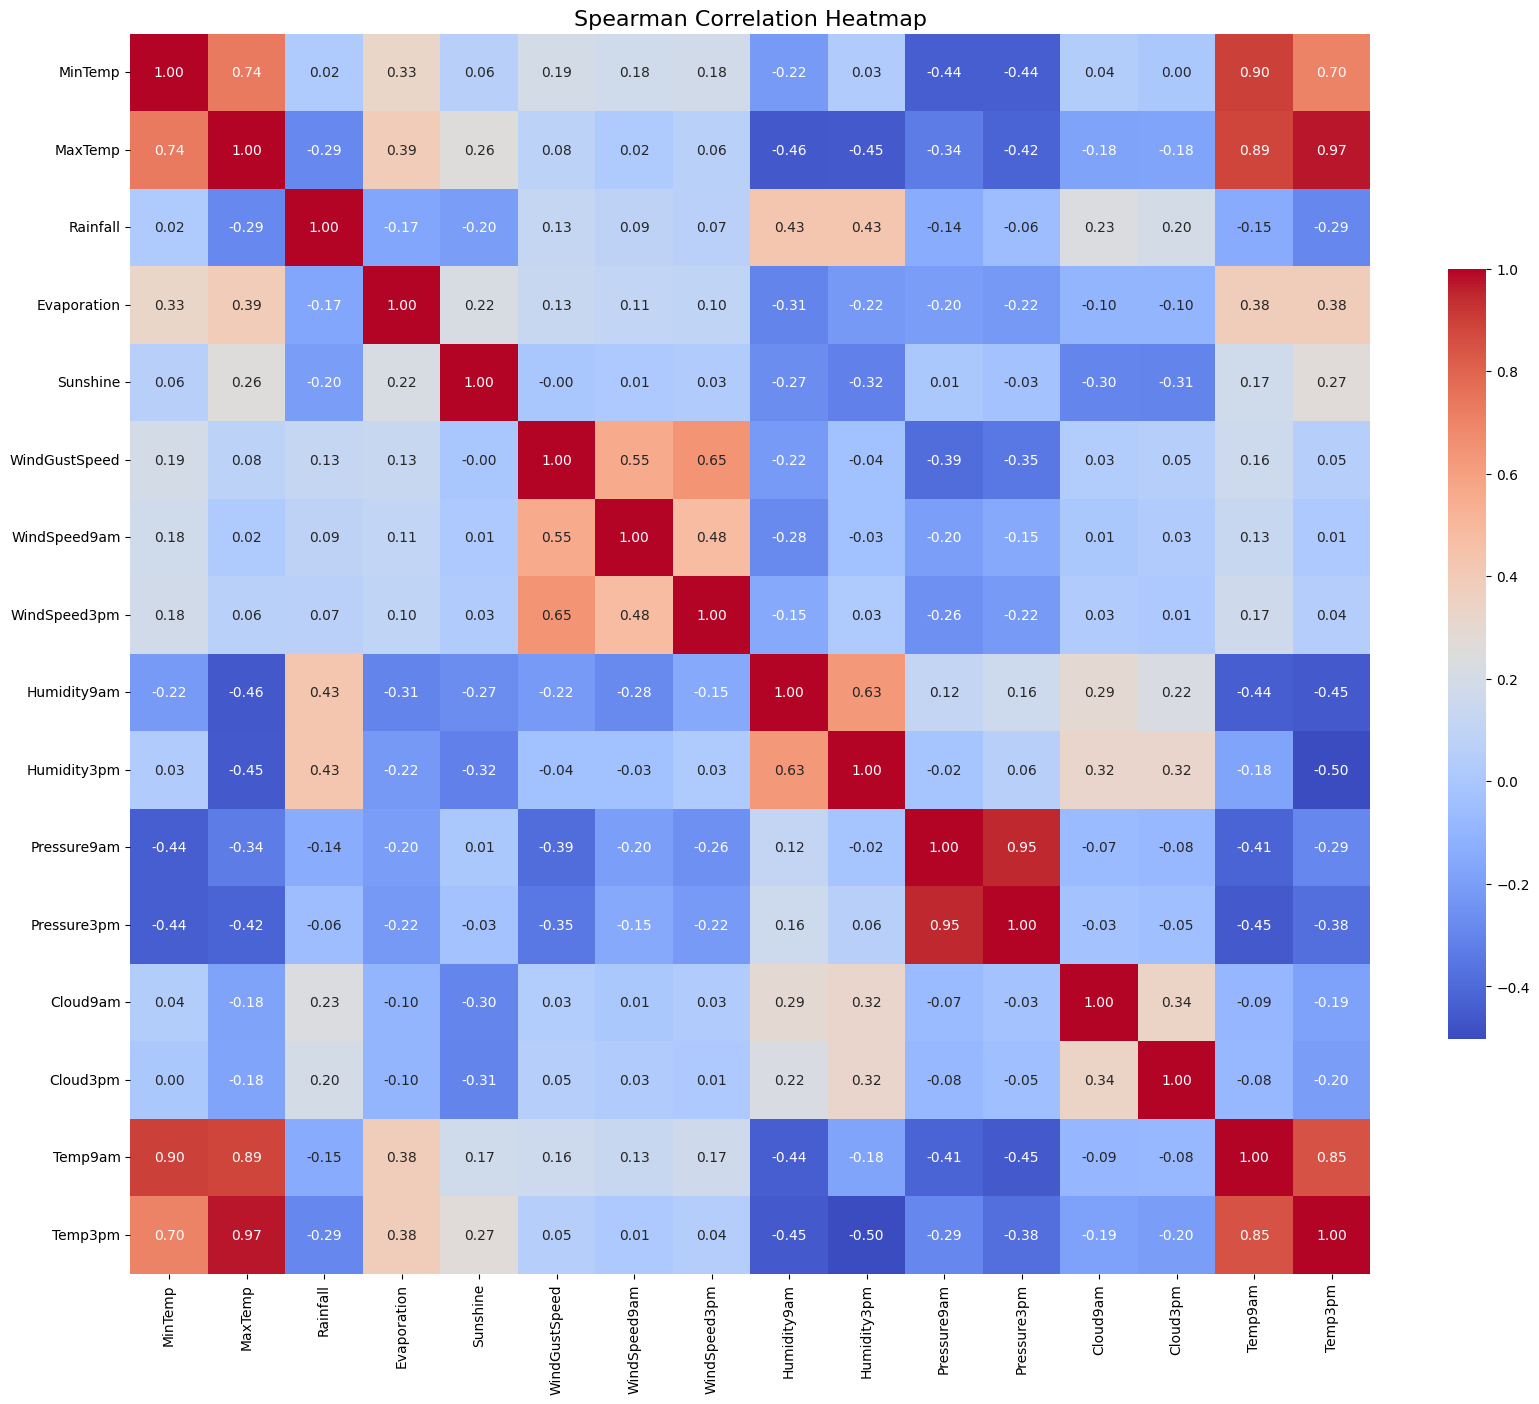

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute Spearman correlation matrix
corrmat = numeric_df.corr(method="spearman")

# Set plot size
plt.figure(figsize=(20, 20))

# Plot heatmap
sns.heatmap(corrmat, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.5})
plt.title("Spearman Correlation Heatmap", fontsize=16)
plt.show()


### Analysis for Continuous variables

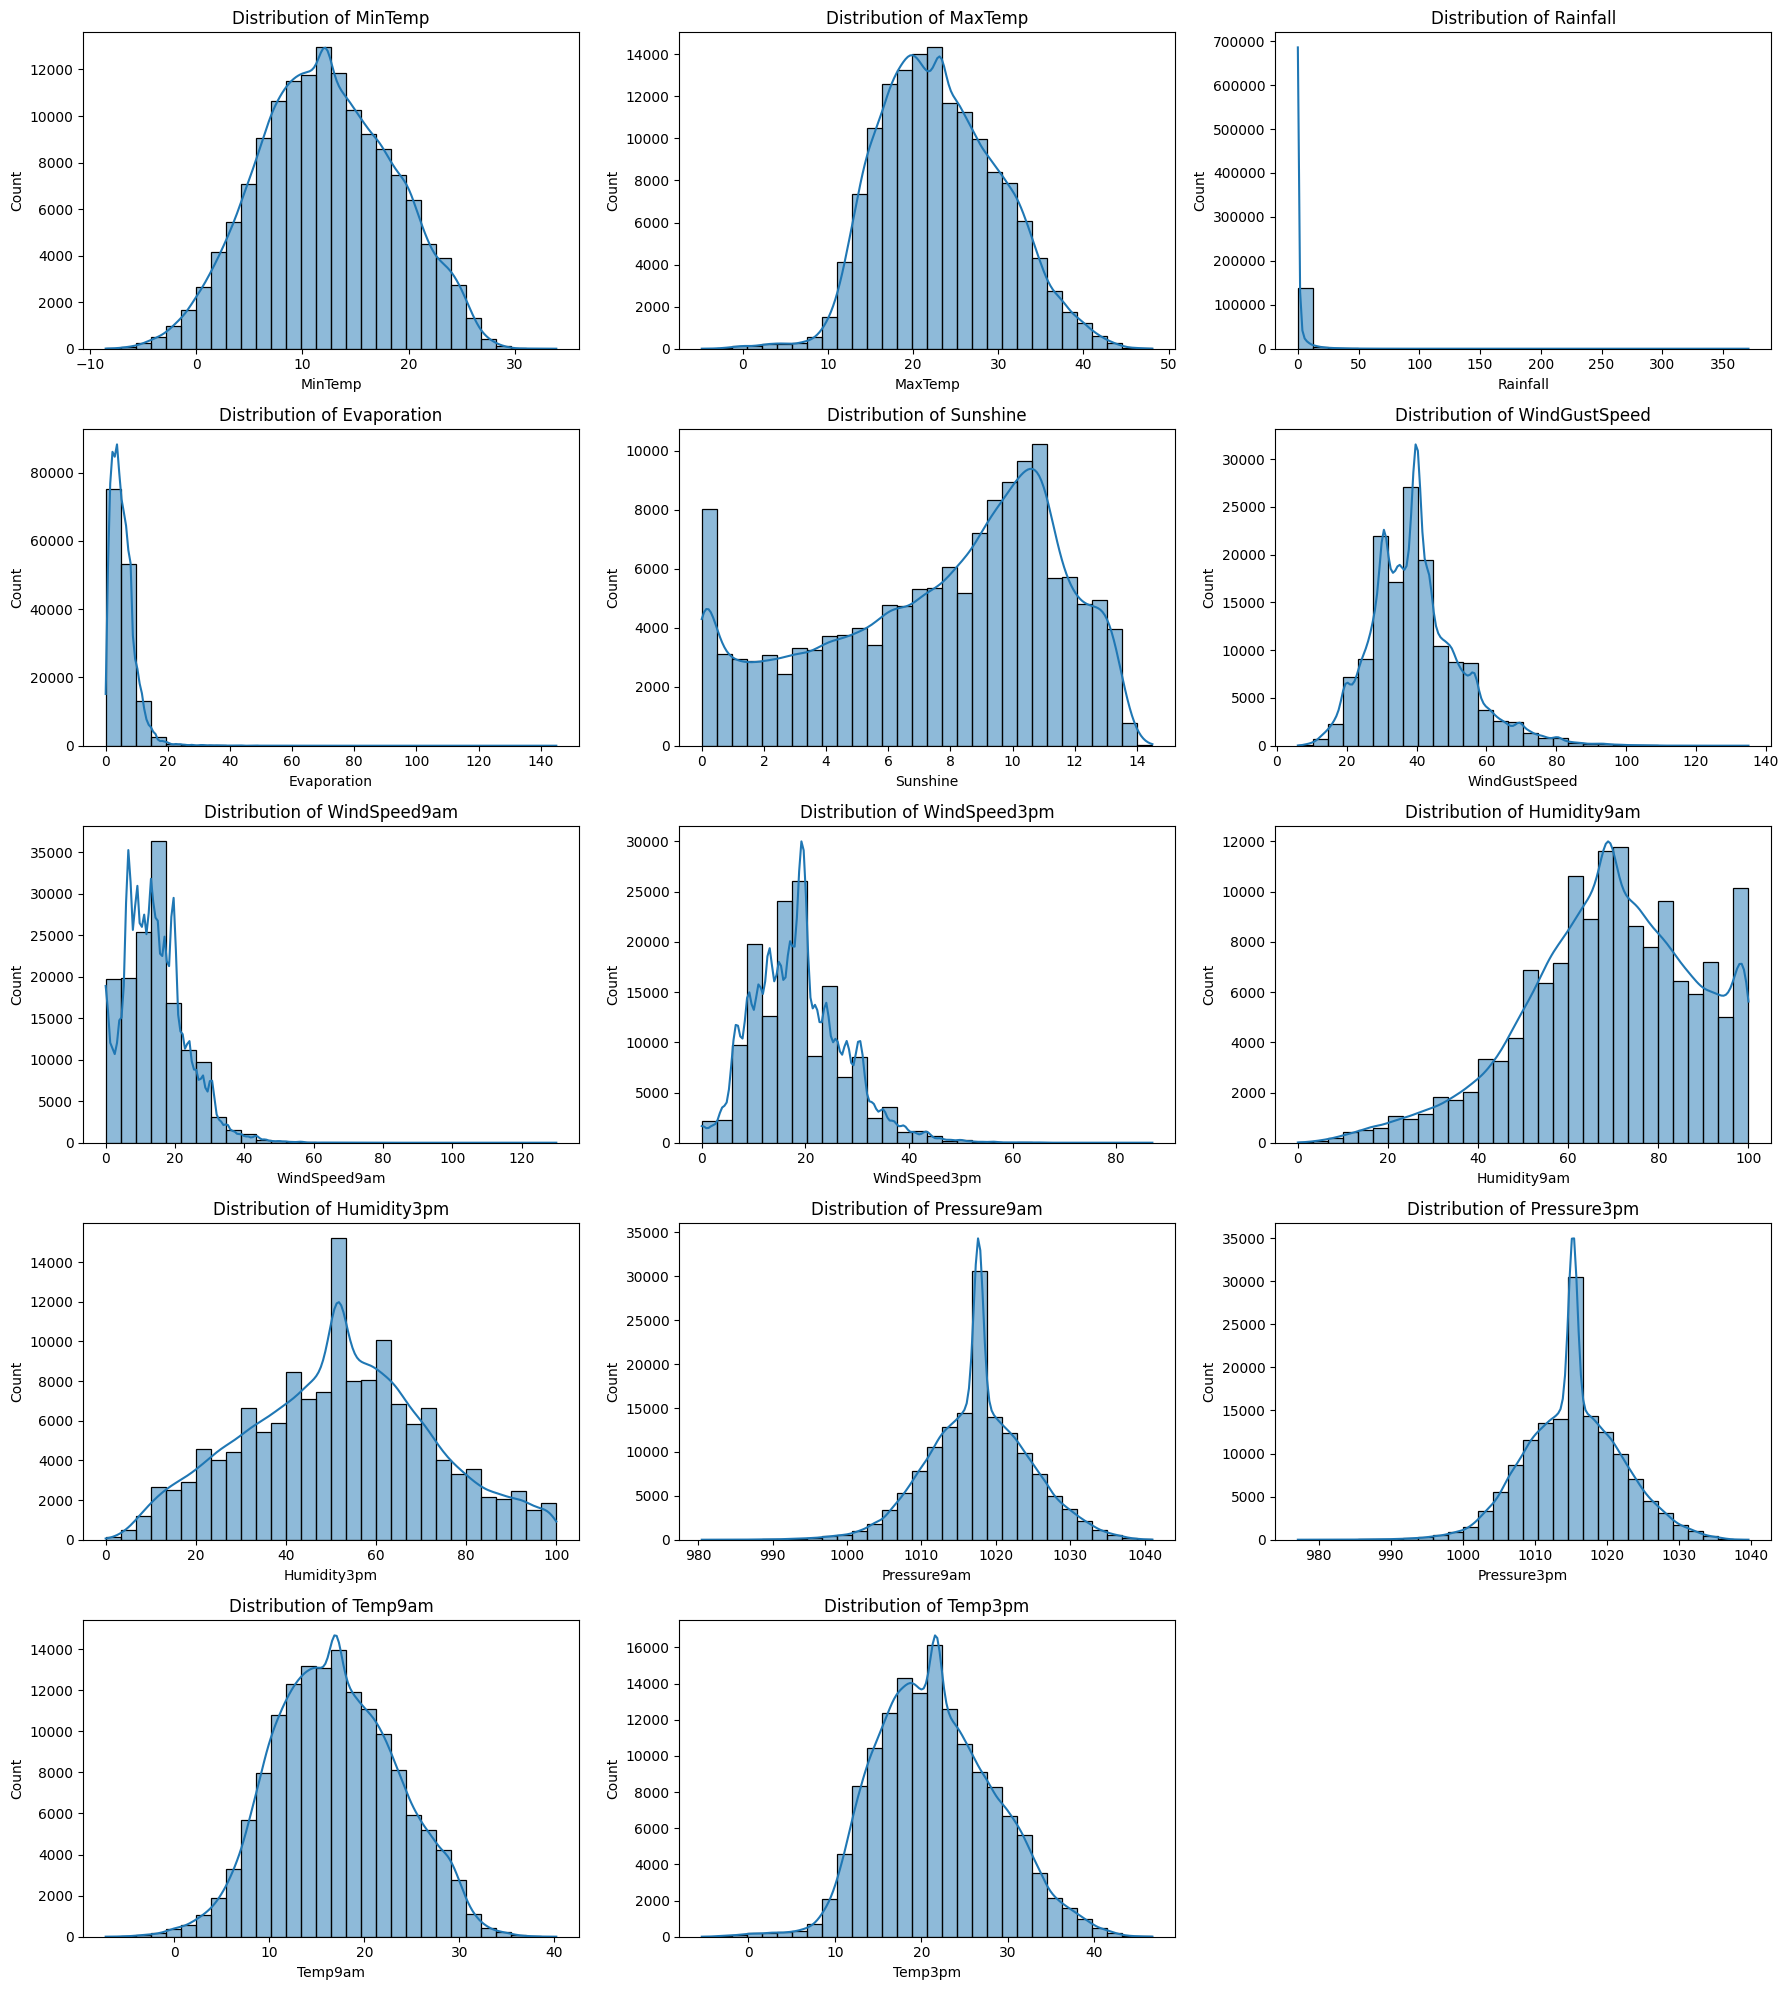

In [22]:


# Number of plots
n = len(cont_var)
cols = 3  # Number of columns in the grid
rows = math.ceil(n / cols)

# Set figure size
plt.figure(figsize=(cols * 6, rows * 4))

for idx, feature in enumerate(cont_var):
    plt.subplot(rows, cols, idx + 1)
    sns.histplot(data=df, x=feature, kde=True, bins=30)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()


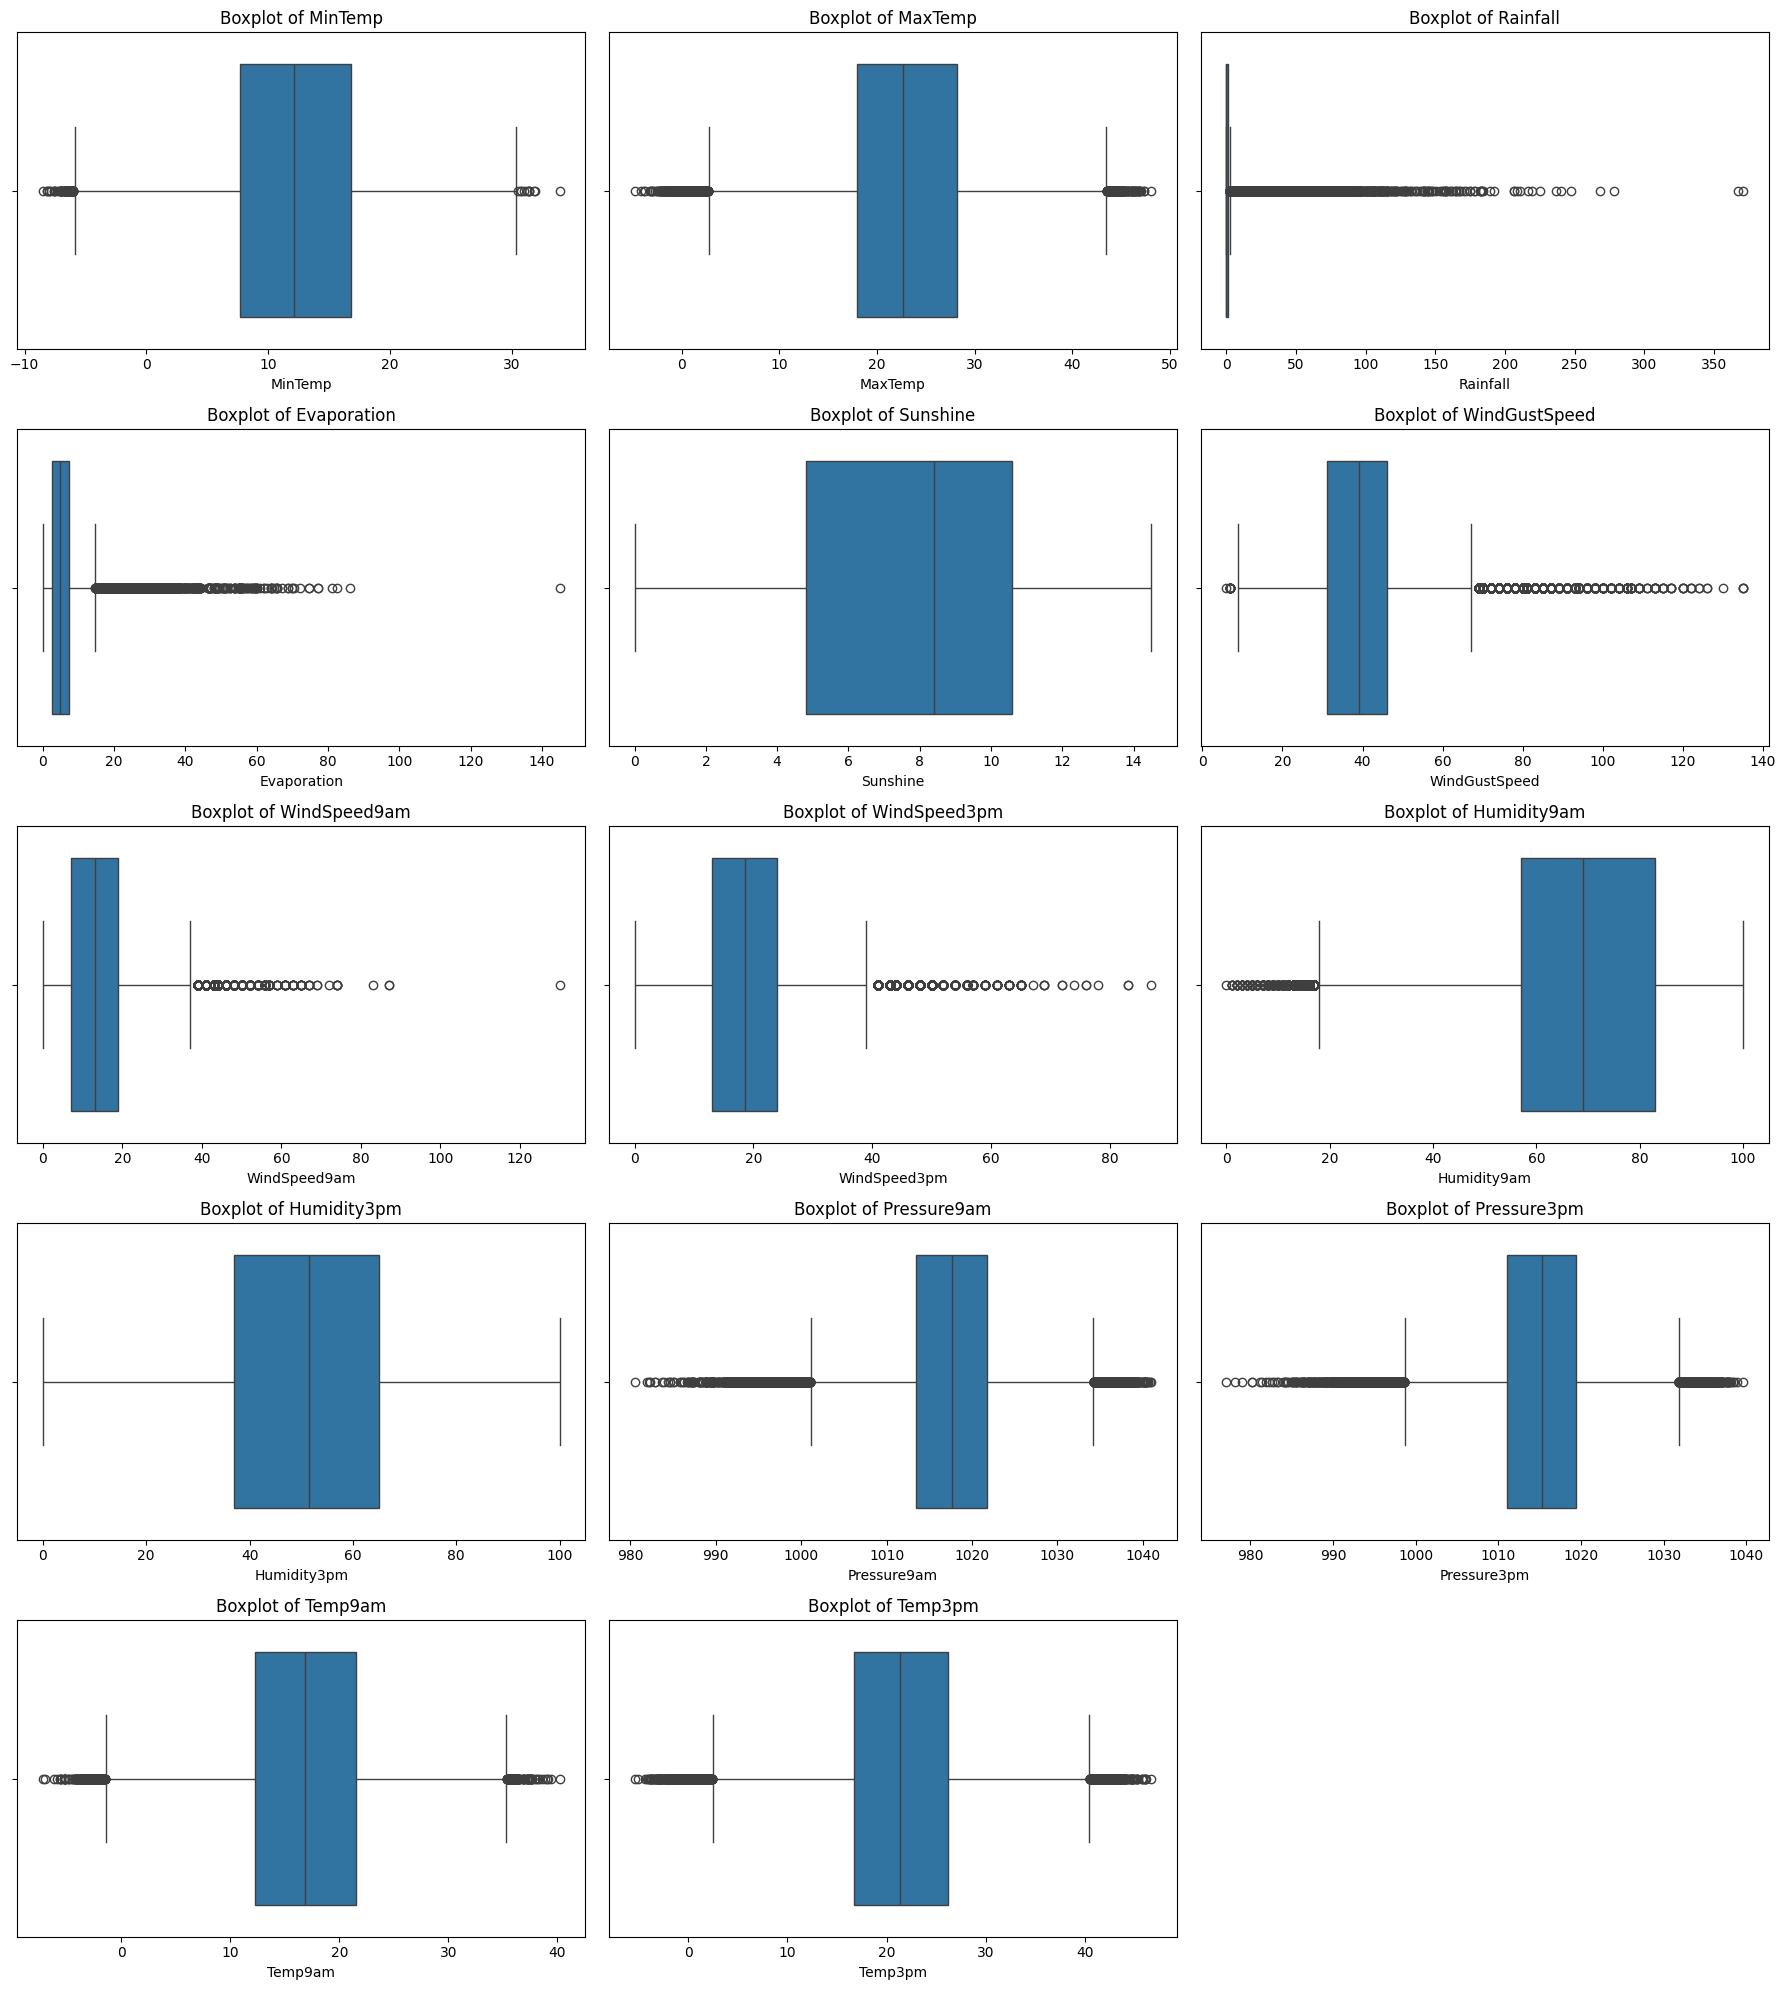

In [23]:
# Number of plots
n = len(cont_var)
cols = 3  # Number of columns in the grid
rows = math.ceil(n / cols)

# Set figure size
plt.figure(figsize=(cols * 6, rows * 4))

for idx, feature in enumerate(cont_var):
    plt.subplot(rows, cols, idx + 1)
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

### One Hot Encoding

In [24]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,0.2,9.8,W,44.00000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,1.0,16.9,21.8,False,False
1,2008-12-02,Albury,7.4,25.100000,0.0,2.6,11.9,WNW,44.00000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,2.0,8.0,17.2,24.3,False,False
2,2008-12-03,Albury,12.9,25.700000,0.0,2.0,9.9,WSW,46.00000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,False,False
3,2008-12-04,Albury,9.2,28.000000,0.0,6.2,9.7,NE,24.00000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,1.0,18.1,26.5,False,False
4,2008-12-05,Albury,17.5,32.300000,1.0,3.6,10.9,W,41.00000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,3.6,10.4,E,31.00000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,6.0,10.1,22.4,False,False
145456,2017-06-22,Uluru,3.6,25.300000,0.0,3.4,10.2,NNW,22.00000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,5.0,10.9,24.5,False,False
145457,2017-06-23,Uluru,5.4,26.900000,0.0,0.6,0.9,N,37.00000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,1.0,1.0,12.5,26.1,False,False
145458,2017-06-24,Uluru,7.8,27.000000,0.0,3.4,0.0,SE,28.00000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,False,False


### Lable Encoding

In [25]:
for feature in categ_var:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2007-12-15', '2007-11-01', '2007-11-02', '2007-12-27', '2008-01-18',
       '2008-02-12', '2008-02-07', '2007-12-24', '2008-01-19', '2008-01-12',
       ...
       '2009-10-21', '2009-10-22', '2007-12-14', '2007-12-17', '2007-12-18',
       '2007-12-23', '2007-11-07', '2007-11-05', '2007-11-12', '2007-11-06'],
      dtype='object', name='Date', length=3436)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Darwin', 'Sydney', 'SydneyAirport', 'Ballarat',
       'GoldCoast', 'Watsonia', 'Newcastle', 'Hobart', 'Wollongong',
       'Williamtown', 'Launceston', 'Brisbane', 'MelbourneAirport', 'Adelaide',
       'Sale', 'Albury', 'Perth', 'Melbourne', 'Nuriootpa', 'Penrith',
       'BadgerysCreek', 'PerthAirport', 'Tuggeranong', 'Richmond', 'Bendigo',
       'Canberra', 'WaggaWagga', 'Townsville', 'Katherine', 'PearceRAAF',
       'SalmonGums', 'Nhil', 

In [26]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [27]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [28]:
df.isnull().sum()*100/len(df)

,0
Date,0.0
Location,0.0
MinTemp,0.0
MaxTemp,0.0
Rainfall,0.0
Evaporation,0.0
Sunshine,0.0
WindGustDir,0.0
WindGustSpeed,0.0
WindDir9am,0.0


In [29]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,0.2,9.8,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,1.0,16.9,21.8,False,False
1,2008-12-02,Albury,7.4,25.1,0.0,2.6,11.9,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,2.0,8.0,17.2,24.3,False,False
2,2008-12-03,Albury,12.9,25.7,0.0,2.0,9.9,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,False,False
3,2008-12-04,Albury,9.2,28.0,0.0,6.2,9.7,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,1.0,18.1,26.5,False,False
4,2008-12-05,Albury,17.5,32.3,1.0,3.6,10.9,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False


### We have removed all the null values and handeled with categorical data

### Now we will do the Label Encoding for our Location according to our Target variable

In [30]:
df_loc = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()

In [31]:
df_loc.head()

RainTomorrow,False,True
Location,,
Adelaide,2505,688
Albany,2138,902
Albury,2422,618
AliceSprings,2796,244
BadgerysCreek,2426,583


In [32]:
import pandas as pd

row = df.iloc[1]  # This is a Series
numeric_row = pd.to_numeric(row, errors='coerce')  # Convert values to numbers; non-numeric become NaN
numeric_row = numeric_row.dropna()  # Drop NaNs
numeric_row.sort_values(ascending=False)


,1
Pressure9am,1010.6
Pressure3pm,1007.8
WindGustSpeed,44.0
Humidity9am,44.0
MaxTemp,25.1
Humidity3pm,25.0
Temp3pm,24.3
WindSpeed3pm,22.0
Temp9am,17.2
Sunshine,11.9


In [33]:
# Assuming df_loc is grouped by "Location" and then counts of "RainTomorrow" are calculated
df_loc = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()

# # Sorting the counts for the specific location (in this case, 1 refers to the second location, change if needed)
# sorted_values = df_loc.iloc[1].sort_values(ascending=False)

# # Display the sorted values
# print(sorted_values)


In [34]:
df_loc.head()

RainTomorrow,False,True
Location,,
Adelaide,2505,688
Albany,2138,902
Albury,2422,618
AliceSprings,2796,244
BadgerysCreek,2426,583


In [35]:
df_loc[True].sort_values(ascending=False)


,True
Location,
Portland,1095
Cairns,950
Walpole,949
Dartmoor,922
MountGambier,920
NorfolkIsland,919
Albany,902
Witchcliffe,879
CoffsHarbour,869


In [36]:
df_loc[True].sort_values(ascending=False).index

Index(['Portland', 'Cairns', 'Walpole', 'Dartmoor', 'MountGambier',
       'NorfolkIsland', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'Sydney',
       'Darwin', 'MountGinini', 'NorahHead', 'Ballarat', 'GoldCoast',
       'SydneyAirport', 'Hobart', 'Watsonia', 'Newcastle', 'Wollongong',
       'Brisbane', 'Williamtown', 'Launceston', 'Adelaide', 'MelbourneAirport',
       'Perth', 'Sale', 'Melbourne', 'Canberra', 'Albury', 'Penrith',
       'Nuriootpa', 'BadgerysCreek', 'Tuggeranong', 'PerthAirport', 'Bendigo',
       'Richmond', 'WaggaWagga', 'Townsville', 'PearceRAAF', 'SalmonGums',
       'Moree', 'Cobar', 'Mildura', 'Katherine', 'AliceSprings', 'Nhil',
       'Woomera', 'Uluru'],
      dtype='object', name='Location')

In [37]:
len(df_loc[True].sort_values(ascending=False))

49

In [38]:
mapped_location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(mapped_location)

### Mapping Data

In [39]:
# df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")
# df["Date_month"] = df["Date"].dt.month
# df["Date_day"] = df["Date"].dt.day

In [40]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d", errors="coerce")
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day


In [41]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,0.2,9.8,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,1.0,16.9,21.8,False,False,12,1
1,2008-12-02,30,7.4,25.1,0.0,2.6,11.9,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,2.0,8.0,17.2,24.3,False,False,12,2
2,2008-12-03,30,12.9,25.7,0.0,2.0,9.9,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,False,False,12,3
3,2008-12-04,30,9.2,28.0,0.0,6.2,9.7,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,1.0,18.1,26.5,False,False,12,4
4,2008-12-05,30,17.5,32.3,1.0,3.6,10.9,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False,12,5


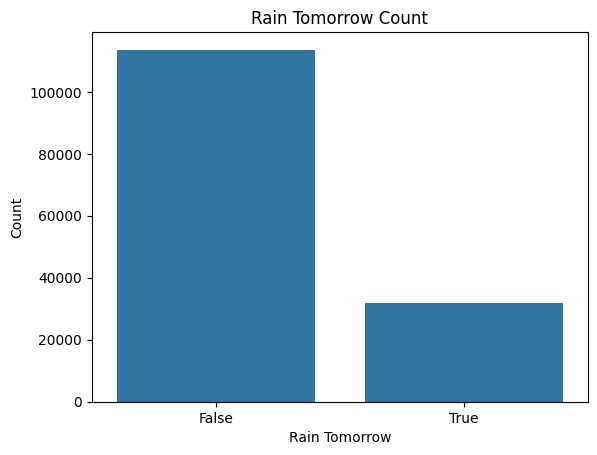

In [42]:
sns.countplot(x="RainTomorrow", data=df)
plt.title("Rain Tomorrow Count")
plt.xlabel("Rain Tomorrow")
plt.ylabel("Count")
plt.show()

In [43]:
df= df.drop(['Date'],axis=1)

In [44]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,30,13.4,22.9,0.6,0.2,9.8,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,1.0,16.9,21.8,False,False,12,1
1,30,7.4,25.1,0.0,2.6,11.9,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,2.0,8.0,17.2,24.3,False,False,12,2
2,30,12.9,25.7,0.0,2.0,9.9,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,False,False,12,3
3,30,9.2,28.0,0.0,6.2,9.7,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,1.0,18.1,26.5,False,False,12,4
4,30,17.5,32.3,1.0,3.6,10.9,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False,12,5


### Plotting Q-Q Plot

In [45]:
import scipy.stats as stats
import pylab

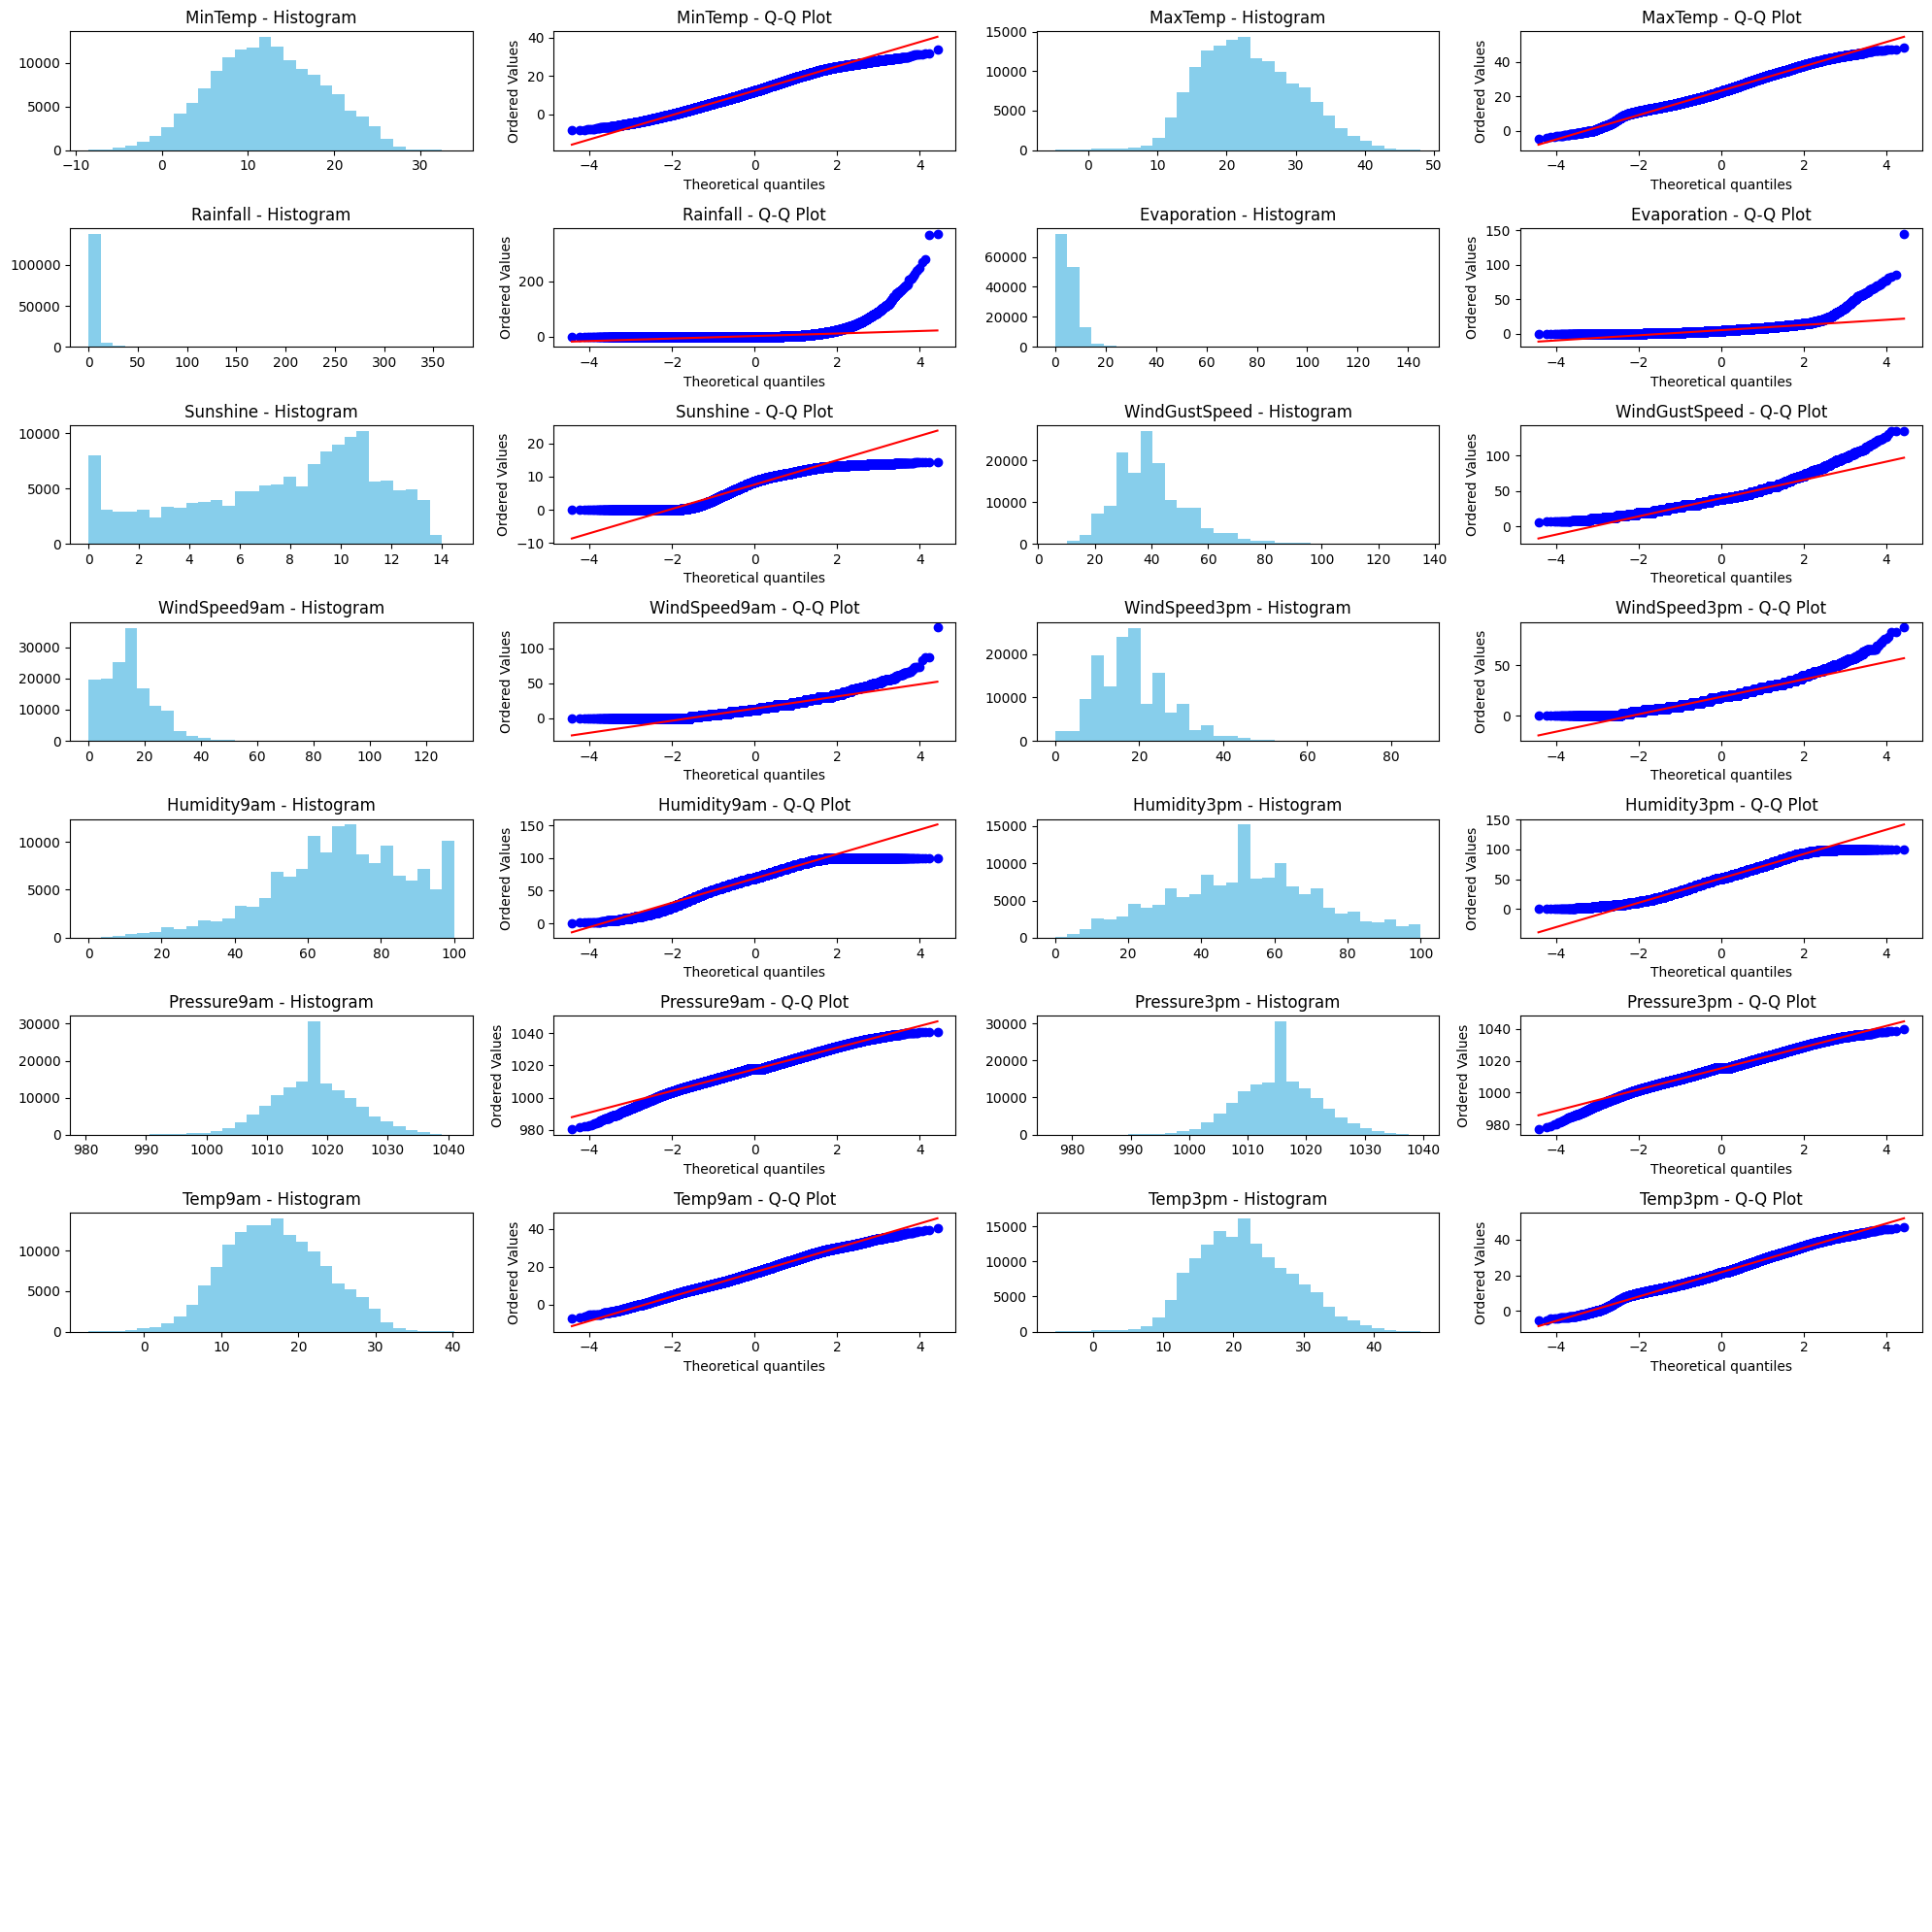

In [48]:
def plot_curve_grid(df, cont_var, rows=5, cols=4):
    fig, axes = plt.subplots(rows * 2, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()

    for i, feature in enumerate(cont_var):
        # Histogram
        axes[2 * i].hist(df[feature].dropna(), bins=30, color='skyblue')
        axes[2 * i].set_title(f'{feature} - Histogram')

        # Q-Q plot
        stats.probplot(df[feature].dropna(), dist="norm", plot=axes[2 * i + 1])
        axes[2 * i + 1].set_title(f'{feature} - Q-Q Plot')

    # Hide any unused subplots
    for j in range(2 * len(cont_var), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function
plot_curve_grid(df, cont_var)


### Splitting the data

In [49]:
x = df.drop(["RainTomorrow"], axis=1)
y = df["RainTomorrow"]

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scale=StandardScaler()

In [53]:
scale.fit(x)

StandardScaler()

In [54]:
X= scale.transform(x)

In [60]:
x.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Date_month', 'Date_day'],
      dtype='object')

In [61]:
X=pd.DataFrame(X,columns=x.columns)

In [62]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Date_month,Date_day
0,0.415017,0.189447,-0.045336,-0.210072,-1.264132,0.578383,-0.740424,0.302234,-0.406066,-1.024910,0.672222,0.612323,0.112395,-1.442965,-1.478788,-1.223882,1.228499,-1.292203,-0.014053,0.017023,-0.529795,1.634076,-1.672844
1,0.415017,-0.753101,0.265043,-0.281650,-0.688781,1.133550,-1.187566,0.302234,-1.439618,-0.357114,-1.133438,0.382874,-1.319609,-1.296417,-1.047782,-1.118839,-0.848646,1.280368,0.032464,0.381985,-0.529795,1.634076,-1.559140
2,0.415017,0.110901,0.349692,-0.281650,-0.832619,0.604819,-0.516853,0.454694,-0.406066,-0.357114,0.559368,0.841771,-1.637832,-1.052171,-1.493650,-0.983784,0.882308,-0.924692,0.621685,0.221402,-0.529795,1.634076,-1.445436
3,0.415017,-0.470337,0.674180,-0.281650,0.174246,0.551946,0.824574,-1.222364,1.247616,1.423675,-0.343462,-1.108541,-1.266572,-1.736061,-0.007422,-0.368534,0.882308,-1.292203,0.172017,0.703151,-0.529795,1.634076,-1.331732
4,0.415017,0.833521,1.280830,-0.162353,-0.449051,0.869185,-0.740424,0.073544,1.040905,-1.692706,-0.794877,0.153426,0.695804,-0.905623,-1.018057,-1.388949,0.882308,1.280368,0.125499,1.170302,-0.529795,1.634076,-1.218028


In [58]:
y.head()

,RainTomorrow
0,False
1,False
2,False
3,False
4,False


In [63]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 0)

## Model Building using ML Models.
- RandomForestClassifier
- GaussianNB
- KNeighborsClassifier
- XGB Classifier

## Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
ranfor= RandomForestClassifier()

In [67]:
ranfor.fit(X_train,y_train)

RandomForestClassifier()

In [68]:
ypred= ranfor.predict(X_test)

In [69]:
print(confusion_matrix(y_test,ypred))
print(accuracy_score(y_test,ypred))
print(classification_report(y_test,ypred))

[[21786   940]
 [ 3300  3066]]
0.8542554654200467
              precision    recall  f1-score   support

       False       0.87      0.96      0.91     22726
        True       0.77      0.48      0.59      6366

    accuracy                           0.85     29092
   macro avg       0.82      0.72      0.75     29092
weighted avg       0.85      0.85      0.84     29092



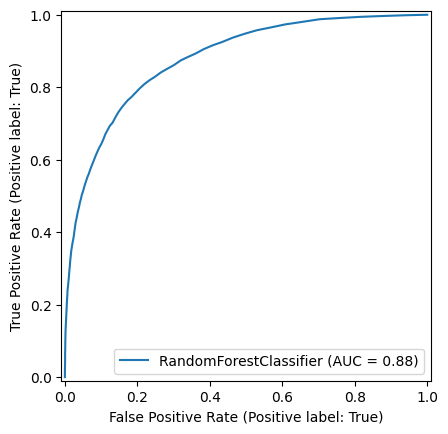

AUC Score: 0.7201293979343144


In [71]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

# Plot ROC Curve
RocCurveDisplay.from_estimator(ranfor, X_test, y_test)

# Show the plot
plt.show()

# Compute AUC Score
print("AUC Score:", roc_auc_score(y_test, ypred))


## Gaussian NB

In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
gnb= GaussianNB()

In [74]:
gnb.fit(X_train,y_train)

GaussianNB()

In [75]:
ypred2= gnb.predict(X_test)

In [76]:
print(confusion_matrix(y_test,ypred2))
print(accuracy_score(y_test,ypred2))
print(classification_report(y_test,ypred2))

[[19844  2882]
 [ 2708  3658]]
0.8078509555891654
              precision    recall  f1-score   support

       False       0.88      0.87      0.88     22726
        True       0.56      0.57      0.57      6366

    accuracy                           0.81     29092
   macro avg       0.72      0.72      0.72     29092
weighted avg       0.81      0.81      0.81     29092



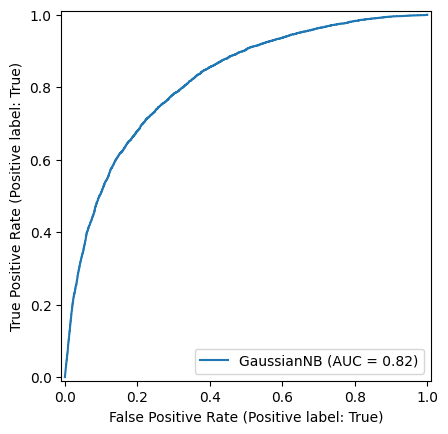

AUC Score: 0.7239000206506067


In [92]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

# Plot ROC Curve
RocCurveDisplay.from_estimator(gnb, X_test, y_test)

# Show the plot
plt.show()

# Compute AUC Score
print("AUC Score:", roc_auc_score(y_test, ypred2))


## K Nearest Neighbors

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn = KNeighborsClassifier(n_neighbors=3)

In [81]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [82]:
ypred3= knn.predict(X_test)

In [83]:
print(confusion_matrix(y_test,ypred3))
print(accuracy_score(y_test,ypred3))
print(classification_report(y_test,ypred3))

[[20939  1787]
 [ 3186  3180]]
0.8290595352674275
              precision    recall  f1-score   support

       False       0.87      0.92      0.89     22726
        True       0.64      0.50      0.56      6366

    accuracy                           0.83     29092
   macro avg       0.75      0.71      0.73     29092
weighted avg       0.82      0.83      0.82     29092



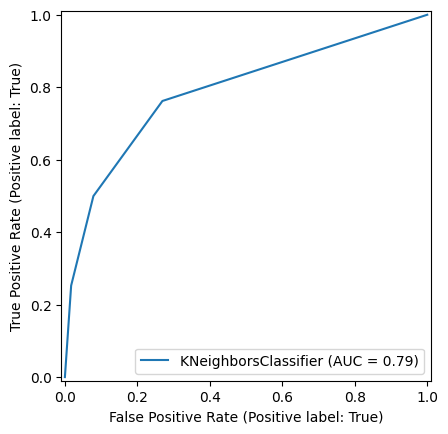

AUC Score: 0.7104481715255037


In [93]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

# Plot ROC Curve
RocCurveDisplay.from_estimator(knn, X_test, y_test)

# Show the plot
plt.show()

# Compute AUC Score
print("AUC Score:", roc_auc_score(y_test, ypred3))


## XGB Classifier

In [85]:
from xgboost import XGBClassifier

In [86]:
xgb= XGBClassifier()

In [87]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [88]:
ypred4= xgb.predict(X_test)

In [89]:
print(confusion_matrix(y_test,ypred4))
print(accuracy_score(y_test,ypred4))
print(classification_report(y_test,ypred4))

[[21508  1218]
 [ 2896  3470]]
0.8585865530042623
              precision    recall  f1-score   support

       False       0.88      0.95      0.91     22726
        True       0.74      0.55      0.63      6366

    accuracy                           0.86     29092
   macro avg       0.81      0.75      0.77     29092
weighted avg       0.85      0.86      0.85     29092



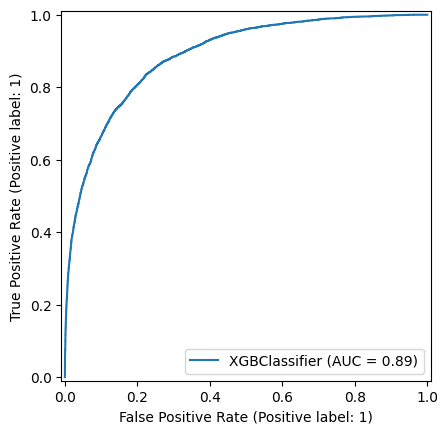

AUC Score: 0.7457441267355018


In [94]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

# Plot ROC Curve
RocCurveDisplay.from_estimator(xgb, X_test, y_test)

# Show the plot
plt.show()

# Compute AUC Score
print("AUC Score:", roc_auc_score(y_test, ypred4))


###  save the best performing model i.e. XGB Classsifier model in our pickle file

In [99]:
import pickle

# Save the model
with open("rain_XGBnew_model.pkl", "wb") as file:
    pickle.dump(xgb, file)


In [100]:
# Load the model
with open("rain_XGBnew_model.pkl", "rb") as file:
    model = pickle.load(file)
